# Определение перспективного тарифа для телеком компании

В данном проекте, мы проведем работу аналитика федерального оператора связи «Мегалайн».   
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов из 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год; и проанализировать поведение клиентов.   

На основе анализа, необходимо сформулировать вывод о том, какой тариф является наилучшим.

Для начала,  
* импортируем библиотеку pandas, необходимую для обработки и анализа данных;  
* модуль .pyplot из библиотеки matplotlib для создания графиков и гистограмм;  
* библиотеку warnings, которая позволяет игнорировать предупреждения от указанного модуля;  
* библиотеку высокоуровневых математических функций numpy;  
* пакет scipy.stats, содержащий статистические распределения и функции

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as st

## Шаг. Откроем данные

Прочитаем csv-файлы методом .read_csv.

In [2]:
df_c = pd.read_csv('/datasets/calls.csv')
df_i = pd.read_csv('/datasets/internet.csv', index_col=0)
df_m = pd.read_csv('/datasets/messages.csv')
df_t = pd.read_csv('/datasets/tariffs.csv')
df_u = pd.read_csv('/datasets/users.csv')

### Описание данных

**Таблица users (информация о пользователях):**
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

In [3]:
df_u.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Таблица calls (информация о звонках):**
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [5]:
df_c.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
len(df_c['user_id'].unique())

492

8 клиентов из 500 не совершали звонки

**Таблица internet (информация об интернет-сессиях):**
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [8]:
df_i.head(5)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [9]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [10]:
len(df_i['user_id'].unique())

497

3 пользователя из 500 ни разу не использовали интернет-трафик за период сбора данных

**Таблица messages (информация о сообщениях):**
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [11]:
df_m.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
len(df_m['user_id'].unique())

426

In [14]:
500 - len(df_m['user_id'].unique())

74

Из 500 пользователей сети 74 человека ни разу не отправляли сообщения за период сбора данных

**Таблица tariffs (информация о тарифах):**
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [15]:
df_t.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Выводы:**

1. Наименования столбцов корректно сформулированы и записаны в одном регистре, благодаря чему к ним легко получить доступ
2. Пропущенных значений нет (пропуски присутствуют только в одной таблице - users в столбце churn_date - и имеют логическое обоснование: тариф ещё действовал на момент выгрузки данных)
3. Все столбцы имеют корректный тип данных, кроме столбцов содержащих даты, которые необходимо будет перевести в соответствующий тип datetime
4. Все таблицы имеют разное количество строк, но в то же время у них есть общие столбцы: id и user_id, по которым в дальнейшем их можно будет объединять для анализа

## Шаг. Подготовим данные

### Типы данных

Приведем данные столбцов с датами в таблицах:
* users (столбцы reg_date и churn_date) 
* calls (столбец call_date)
* internet (столбец session_date)
* messages (столбец message_date)

из строкового типа object к нужному типу данных datetime (дата и время).  

Произведем замену при помощи метода .to_datetime и убедимся в том, что все выполнено корректно:  

**таблица users:**

In [17]:
df_u.reg_date = pd.to_datetime(df_u.reg_date, format='%Y-%m-%d')
df_u.churn_date = pd.to_datetime(df_u.churn_date, format='%Y-%m-%d')

df_u.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

**таблица calls:**

In [18]:
df_c.call_date = pd.to_datetime(df_c.call_date, format='%Y-%m-%d')

df_c.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

**таблица internet:**

In [19]:
df_i.session_date = pd.to_datetime(df_i.session_date, format='%Y-%m-%d')

df_i.dtypes

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

**таблица messages:**

In [20]:
df_m.message_date = pd.to_datetime(df_m.message_date, format='%Y-%m-%d')

df_m.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

### Найдем и исправим ошибки в данных.

**таблица users:**

In [21]:
df_u.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [22]:
df_u.tariff.value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [23]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [24]:
df_u.age.describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

По таблице с информацией о пользователях ошибок не видно

**таблица calls:**

In [25]:
df_c.duration.describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [26]:
df_c.query('duration == 0.0').duration.count()

39613

Мы нашли много звонков с продолжительностью 0 мин 0 сек, которые могут свидетельствовать о том, что разговор был прерван не начавшись по множеству причин: например, уже пересечено ограничение трафика по минутам в этом периоде, собеседник принял и сбросил звонок одномоментно и т.п. причины. Мы должны оставить эти данные для того, чтобы они участвовали в дальнейшем анализе.

По условию, «Мегалайн» всегда округляет вверх значения минут и мегабайтов.  
Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. 

Округлим вверх все значения в столбцах с минутами (столбец duration):

In [27]:
df_c['duration'] = np.ceil(df_c['duration']).astype('int')
df_c.dtypes

id                   object
call_date    datetime64[ns]
duration              int64
user_id               int64
dtype: object

**таблица internet:**

In [28]:
df_i.mb_used.describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [29]:
df_i.query('mb_used == 0.0').mb_used.count()

19598

Мы определили количество позиций с нулевыми Мб, которые могут свидетельствовать о том, что пользователь не пользовался интернетом, либо пытался воспользоваться но не смог по каким-то техническим или иным причинам. Оставим эти данные для того, чтобы они участвовали в дальнейшем анализе.

По условию, «Мегалайн» всегда округляет вверх значения минут и мегабайтов.

Округлим вверх все значения в столбцах с мегабайтами (столбец mb_used):

In [30]:
df_i['mb_used'] = np.ceil(df_i['mb_used']).astype('int')
df_i.dtypes

id                      object
mb_used                  int64
session_date    datetime64[ns]
user_id                  int64
dtype: object

**таблица messages:**

In [31]:
df_m.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**таблица tariffs:**

1. **Тариф «Смарт»**

-Ежемесячная плата: 550 рублей (rub_monthly_fee)  
-Включено 500 минут разговора (minutes_included)  
-50 сообщений (messages_included)  
-15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля (rub_per_minute)
* сообщение: 3 рубля (rub_per_message)
* 1 Гб интернет-трафика: 200 рублей (rub_per_gb)


2. **Тариф «Ультра»**

-Ежемесячная плата: 1950 рублей (rub_monthly_fee)  
-Включено 3000 минут разговора (minutes_included)  
-1000 сообщений (messages_included)  
-30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль (rub_per_minute)
* сообщение: 1 рубль (rub_per_message)
* 1 Гб интернет-трафика: 150 рублей (rub_per_gb)

In [32]:
df_t

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Информация совпадает по строкам из условия и столбцам по таблице с тарифами, за исключением одного столбца: mb_per_month_included (объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)):

По условию:  
* тариф "Смарт" включает 15 Гб трафиика в месяц, что соответствует 15 000 Мб  
* а тариф "Ультра" включает 30 Гб, это 30 000 Мб траффика в месяц.

Исправим ошибки в данном столбце:

In [33]:
df_t.mb_per_month_included = np.where(df_t.tariff_name=="smart", 15000, df_t.mb_per_month_included)
df_t.mb_per_month_included = np.where(df_t.tariff_name!="smart", 30000, df_t.mb_per_month_included)

df_t

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15000,500,550,200,3,3,smart
1,1000,30000,3000,1950,150,1,1,ultra


###  Посчитаем для каждого пользователя:

####  количество сделанных звонков и израсходованных минут разговора по месяцам

**Используем таблицу calls**  
Добавим в таблицу с информацией о звонках дополнительный столбец: месяц (month), в который был совершен звонок (-ки), и сгруппируем данные с минутами и количеством звонков по месяцам:

In [34]:
df_c['month'] = pd.DatetimeIndex(df_c.call_date).month
df_c.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [35]:
df_calls = df_c.groupby(['user_id', 'month']).agg({'id': ['count'], 'duration': ['sum']})
df_calls.columns = ['calls_per_month', 'min_per_month']
df_calls.head(10)

calls_per_month  min_per_month
user_id month                                
1000    5                   22            159
        6                   43            172
        7                   47            340
        8                   52            408
        9                   58            466
        10                  57            350
        11                  43            338
        12                  46            333
1001    11                  59            430
        12                  63            414

#### количество отправленных сообщений по месяцам

**Используем таблицу messages**  
Добавим в таблицу, аналогичным способом, столбец месяц (month), в который были отправлены сообщения, и сгруппируем по нему данные с количеством смс:

In [36]:
df_m['month'] = pd.DatetimeIndex(df_m.message_date).month
df_m.head(5)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [37]:
df_messages = df_m.groupby(['user_id', 'month']).agg({'id': ['count']})
df_messages.columns = ['messages_per_month']
df_messages.head(10)

messages_per_month
user_id month                    
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57
        10                     73
        11                     58
        12                     70
1002    6                       4
        7                      11

#### объем израсходованного интернет-трафика по месяцам

**Используем таблицу internet**  
Добавим в таблицу, аналогичным способом, столбец месяц (month), в который был использован трафик, и сгруппируем по нему данные с количеством мб:

In [38]:
df_i['month'] = pd.DatetimeIndex(df_i.session_date).month
df_i.head(5)

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


In [39]:
df_internet = df_i.groupby(['user_id', 'month']).agg({'mb_used': ['sum']})

df_internet.columns = ['mb_per_month']
df_internet['gb_per_month'] = np.ceil(df_internet.mb_per_month / 1024).astype('int')
df_internet.head(10)

mb_per_month  gb_per_month
user_id month                            
1000    5              2256             3
        6             23257            23
        7             14016            14
        8             14070            14
        9             14581            15
        10            14717            15
        11            14768            15
        12             9827            10
1001    11            18452            19
        12            14053            14

#### помесячная выручка с каждого пользователя   
Создадим таблицу, в которой объединим все сгруппированные по месяцам данные каждого пользователя сотовой связи оператора «Мегалайн».

In [40]:
df_u.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [41]:
df_u[['user_id']].nunique()

user_id    500
dtype: int64

In [42]:
df_joined = df_u[['user_id']].set_index('user_id').join(df_calls, how = 'outer')
df_joined = df_joined.join(df_messages, how = 'outer')
df_joined = df_joined.join(df_internet, how = 'outer')
df_joined.reset_index()['user_id'].nunique()

498

In [43]:
print(list(set(df_u.reset_index()['user_id'].unique()) - set(df_joined.reset_index()['user_id'].unique())))

[1128, 1371]


In [44]:
print('Пользователь с id = 1128')
print('совершил', df_c.query('user_id == 1128').duration.count(), 'звонков')
print('отправил', df_m.query('user_id == 1128').message_date.count(), 'сообщений')
print('потратил', df_i.query('user_id == 1128').mb_used.count(), 'Мб')
print()
print('Пользователь с id = 1371')
print('совершил', df_c.query('user_id == 1371').duration.count(), 'звонков')
print('отправил', df_m.query('user_id == 1371').message_date.count(), 'сообщений')
print('потратил', df_i.query('user_id == 1371').mb_used.count(), 'Мб')

Пользователь с id = 1128
совершил 0 звонков
отправил 0 сообщений
потратил 0 Мб

Пользователь с id = 1371
совершил 0 звонков
отправил 0 сообщений
потратил 0 Мб


Вполне логично что 2 пользователя, совсем не пользующихся услугами оператора связи, не вошли в сводную таблицу.  
Примем решение в дальнейшем не брать их в учет из-за нулевой активности.

In [45]:
df_joined.head(10)

calls_per_month  min_per_month  messages_per_month  \
user_id month                                                       
1000    5                 22.0          159.0                22.0   
        6                 43.0          172.0                60.0   
        7                 47.0          340.0                75.0   
        8                 52.0          408.0                81.0   
        9                 58.0          466.0                57.0   
        10                57.0          350.0                73.0   
        11                43.0          338.0                58.0   
        12                46.0          333.0                70.0   
1001    11                59.0          430.0                 NaN   
        12                63.0          414.0                 NaN   

               mb_per_month  gb_per_month  
user_id month                              
1000    5            2256.0           3.0  
        6           23257.0          23.0  
        7           14016.0          14.0  
        8           14070.0          14.0  
        9           14581.0          15.0  
        10          14717.0          15.0  
        11          14768.0          15.0  
        12           9827.0          10.0  
1001    11          18452.0          19.0  
        12          14053.0          14.0

Посмотрим за сколько лет собирались данные по звонкам, интернет-сессиям и сообщениям:

In [50]:
pd.DatetimeIndex(df_u['reg_date']).year.value_counts()

2018    500
Name: reg_date, dtype: int64

In [51]:
pd.DatetimeIndex(df_m['message_date']).year.value_counts()

2018    123036
Name: message_date, dtype: int64

In [52]:
pd.DatetimeIndex(df_c['call_date']).year.value_counts()

2018    202607
Name: call_date, dtype: int64

In [53]:
pd.DatetimeIndex(df_i['session_date']).year.value_counts()

2018    149396
Name: session_date, dtype: int64

Мы выяснили, что все данные были собраны за месяцы одного года (2018), поэтому год можно не учитывать в дальнейшем анализе данных, т.к. сгруппированные по месяцам данные уже никак не пересекутся.

В нашу сводную таблицу df_joined необходимо добавить тариф из таблицы tariffs для каждого пользователя сети:

In [54]:
df_user = df_u[['user_id', 'tariff']]

df_joined = df_joined.join(df_user.set_index('user_id'))

In [55]:
df_joined

calls_per_month  min_per_month  messages_per_month  \
user_id month                                                       
1000    5                 22.0          159.0                22.0   
        6                 43.0          172.0                60.0   
        7                 47.0          340.0                75.0   
        8                 52.0          408.0                81.0   
        9                 58.0          466.0                57.0   
...                        ...            ...                 ...   
1498    10                41.0          247.0                42.0   
1499    9                  9.0           70.0                11.0   
        10                68.0          449.0                48.0   
        11                74.0          612.0                59.0   
        12                69.0          492.0                66.0   

               mb_per_month  gb_per_month tariff  
user_id month                                     
1000    5            2256.0           3.0  ultra  
        6           23257.0          23.0  ultra  
        7           14016.0          14.0  ultra  
        8           14070.0          14.0  ultra  
        9           14581.0          15.0  ultra  
...                     ...           ...    ...  
1498    10          20604.0          21.0  smart  
1499    9            1848.0           2.0  smart  
        10          17809.0          18.0  smart  
        11          17984.0          18.0  smart  
        12          13077.0          13.0  smart  

[3214 rows x 6 columns]

In [56]:
df_t

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15000,500,550,200,3,3,smart
1,1000,30000,3000,1950,150,1,1,ultra


Объединим при помощи метода .join таблицу с данными о тарифных планах с таблицей с данными о клиентах по столбцу с названием тарифного плана. Также избавимся от мультиинлекса при помощи .reset_index

In [57]:
df_joined = df_joined.join(df_t.set_index('tariff_name'), on="tariff",  how = 'outer').reset_index(level=[0, 1])
df_joined

,user_id,month,calls_per_month,min_per_month,messages_per_month,mb_per_month,gb_per_month,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2256.0,3.0,ultra,1000,30000,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23257.0,23.0,ultra,1000,30000,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14016.0,14.0,ultra,1000,30000,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14070.0,14.0,ultra,1000,30000,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14581.0,15.0,ultra,1000,30000,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20604.0,21.0,smart,50,15000,500,550,200,3,3
3210,1499,9,9.0,70.0,11.0,1848.0,2.0,smart,50,15000,500,550,200,3,3
3211,1499,10,68.0,449.0,48.0,17809.0,18.0,smart,50,15000,500,550,200,3,3
3212,1499,11,74.0,612.0,59.0,17984.0,18.0,smart,50,15000,500,550,200,3,3


Округлим вверх Мб до Гб и запишем в отдельный столбец для удобства дальнейших подсчетов. Удалим столбцы с Мб (они нам не пригодятся)

In [58]:
df_joined['gb_per_month_included'] = df_joined['mb_per_month_included'] / 1024
df_joined.drop(columns=['mb_per_month_included', 'mb_per_month'], inplace=True)
df_joined

,user_id,month,calls_per_month,min_per_month,messages_per_month,gb_per_month,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22.0,159.0,22.0,3.0,ultra,1000,3000,1950,150,1,1,29.296875
1,1000,6,43.0,172.0,60.0,23.0,ultra,1000,3000,1950,150,1,1,29.296875
2,1000,7,47.0,340.0,75.0,14.0,ultra,1000,3000,1950,150,1,1,29.296875
3,1000,8,52.0,408.0,81.0,14.0,ultra,1000,3000,1950,150,1,1,29.296875
4,1000,9,58.0,466.0,57.0,15.0,ultra,1000,3000,1950,150,1,1,29.296875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21.0,smart,50,500,550,200,3,3,14.648438
3210,1499,9,9.0,70.0,11.0,2.0,smart,50,500,550,200,3,3,14.648438
3211,1499,10,68.0,449.0,48.0,18.0,smart,50,500,550,200,3,3,14.648438
3212,1499,11,74.0,612.0,59.0,18.0,smart,50,500,550,200,3,3,14.648438


Произведем рассчет помесячной выручки с каждого пользователя:  
суммируем абонентскую плату и стоимость тарифного плана при помощи функции и прохода по всем строкам таблицы df_joined;  
запишем результат в отдельный столбец:

In [59]:
def monthly_income(row):
    income = (row['rub_monthly_fee']
              + max(0, (row['min_per_month'] - row['minutes_included']))*row['rub_per_minute'] 
              + max(0, (row['messages_per_month'] - row['messages_included']))*row['rub_per_message'] 
              + max(0, (row['gb_per_month'] - row['gb_per_month_included']))*row['rub_per_gb'])
    return income

df_joined['monthly_income'] = df_joined.apply(monthly_income, axis=1)
df_joined

,user_id,month,calls_per_month,min_per_month,messages_per_month,gb_per_month,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,monthly_income
0,1000,5,22.0,159.0,22.0,3.0,ultra,1000,3000,1950,150,1,1,29.296875,1950.0000
1,1000,6,43.0,172.0,60.0,23.0,ultra,1000,3000,1950,150,1,1,29.296875,1950.0000
2,1000,7,47.0,340.0,75.0,14.0,ultra,1000,3000,1950,150,1,1,29.296875,1950.0000
3,1000,8,52.0,408.0,81.0,14.0,ultra,1000,3000,1950,150,1,1,29.296875,1950.0000
4,1000,9,58.0,466.0,57.0,15.0,ultra,1000,3000,1950,150,1,1,29.296875,1950.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21.0,smart,50,500,550,200,3,3,14.648438,1820.3125
3210,1499,9,9.0,70.0,11.0,2.0,smart,50,500,550,200,3,3,14.648438,550.0000
3211,1499,10,68.0,449.0,48.0,18.0,smart,50,500,550,200,3,3,14.648438,1220.3125
3212,1499,11,74.0,612.0,59.0,18.0,smart,50,500,550,200,3,3,14.648438,1583.3125


In [60]:
df_joined.monthly_income.describe()

count    3214.000000
mean     1569.301610
std       812.356624
min       550.000000
25%       820.312500
50%      1734.312500
75%      1950.000000
max      6840.312500
Name: monthly_income, dtype: float64

**Вывод**

В данном пункте мы произвели подготовку данных, выполнив следующие шаги:
1. мы изменили тип данных во всех таблицах, где есть столбцы с датами, с типа object на тип дата и время
2. округлили вверх минуты в таблице со звонками и мегабайты в таблице с интернет-трафиком, т.к. по условию при подсчете стоимости услуг, они автоматически округляются до верхнего целого значения
3. в таблице с тарифами, согласно условию задания, исправили значения с количеством Мб, включенным в трафик; округлили Мб до Гб (т.к. плата взимается именно за Гб)
4. посчитали для каждого пользователя по месяцам: количество звонков и минут разговора, количество сообщений, количество использованных Мб и округлили их до Гб. Сформировали для удобства таблицу, содержащую все эти данные, сагрегированные по пользователям и месяцам, в которые они пользовались услугами оператора сотовой связи. 
5. в сводную таблицу добавили столбец с подсчетом помесячной выручки с каждого пользователя, в учет которого взяли как основной действующий тариф, так и стоимость всех услуг, вышедших за его рамки.

## Шаг. Проанализируем данные
 
### Сколько минут разговора требуется пользователям каждого тарифа в месяц?

In [61]:
ultra_min = df_joined.query('tariff =="ultra"').min_per_month
ultra_min.describe()

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: min_per_month, dtype: float64

In [62]:
smart_min = df_joined.query('tariff =="smart"').min_per_month
smart_min.describe()

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: min_per_month, dtype: float64

Посчитаем среднее значение, оценку дисперсии выборки при помощи метода .var с параметром ddof=1 (т.к. мы располагаем только выборкой а не самой генеральной совокупностью) и стандартное отклонение для каждого тарифа по потраченным минутам:

In [63]:
mean_ultra_min = np.mean(ultra_min)
var_ultra_min = np.var(ultra_min, ddof=1)
std_ultra_min = np.std(ultra_min)

print('Тариф "Ультра" (по истраченным минутам):')
print()
print('среднее значение:', mean_ultra_min)
print('оценка дисперсии:', var_ultra_min)
print('стандартное отклонение:', std_ultra_min)
print()

mean_smart_min = np.mean(smart_min)
var_smart_min = np.var(smart_min, ddof=1)
std_smart_min = np.std(smart_min)

print('Тариф "Смарт" (по истраченным минутам):')
print()
print('среднее значение:', mean_smart_min)
print('оценка дисперсии:', var_smart_min)
print('стандартное отклонение:', std_smart_min)

Тариф "Ультра" (по истраченным минутам):

среднее значение: 545.4511041009464
оценка дисперсии: 94203.41839614809
стандартное отклонение: 306.7643414314314

Тариф "Смарт" (по истраченным минутам):

среднее значение: 419.0629779577148
оценка дисперсии: 35844.1895513438
стандартное отклонение: 189.2830296395594


Построим гистограмму распределения истраченных минут по обоим тарифам:

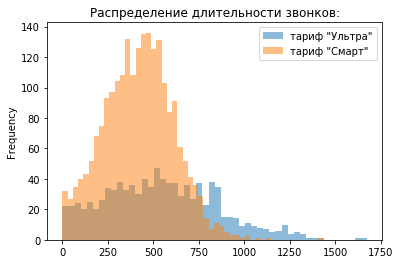

In [64]:
ultra_min.plot(kind='hist', bins=50, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение длительности звонков:')
smart_min.plot(kind='hist', bins=50, label='тариф "Смарт"', legend=True, alpha=0.5)
plt.show()

По полученным данным можно сделать вывод о том, что пользователи тарифа Ультра в среднем каждый месяц тратят больше минут на разговоры, чем пользователи тарифа Смарт.

### Сколько сообщений требуется пользователям каждого тарифа в месяц?

In [65]:
ultra_mess = df_joined.query('tariff =="ultra"').messages_per_month
ultra_mess.describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages_per_month, dtype: float64

In [66]:
smart_mess = df_joined.query('tariff =="smart"').messages_per_month
smart_mess.describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_per_month, dtype: float64

Посчитаем среднее значение, оценку дисперсии выборки и стандартное отклонение для каждого тарифа по потраченным сообщениям:

In [67]:
mean_ultra_mess = np.mean(ultra_mess)
var_ultra_mess = np.var(ultra_mess, ddof=1)
std_ultra_mess = np.std(ultra_mess)

print('Тариф "Ультра" (по истраченным сообщениям):')
print()
print('среднее значение:', mean_ultra_min)
print('оценка дисперсии:', var_ultra_min)
print('стандартное отклонение:', std_ultra_min)
print()

mean_smart_mess = np.mean(smart_mess)
var_smart_mess = np.var(smart_mess, ddof=1)
std_smart_mess = np.std(smart_mess)

print('Тариф "Смарт" (по истраченным сообщениям):')
print()
print('среднее значение:', mean_smart_mess)
print('оценка дисперсии:', var_smart_mess)
print('стандартное отклонение:', std_smart_mess)

Тариф "Ультра" (по истраченным сообщениям):

среднее значение: 545.4511041009464
оценка дисперсии: 94203.41839614809
стандартное отклонение: 306.7643414314314

Тариф "Смарт" (по истраченным сообщениям):

среднее значение: 38.71644120707596
оценка дисперсии: 717.5942011753547
стандартное отклонение: 26.780979129042816


Построим гистограмму распределения отправленных сообщений по обоим тарифам:

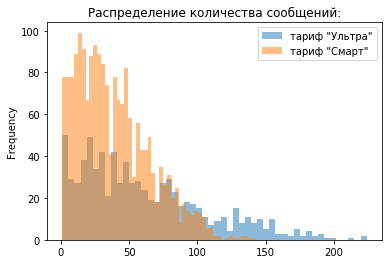

In [68]:
ultra_mess.plot(kind='hist', bins=50, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение количества сообщений:')
smart_mess.plot(kind='hist', bins=50, label='тариф "Смарт"', legend=True, alpha=0.5)
plt.show()

Мы можем отметить, что пользователи тарифа Ультра в среднем каждый месяц отправляют значительно больше сообщений, чем пользователи тарифа Смарт.

### Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

In [69]:
ultra_gb = df_joined.query('tariff =="ultra"').gb_per_month
ultra_gb.describe()

count    975.000000
mean      19.726154
std        9.714924
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_per_month, dtype: float64

In [70]:
smart_gb = df_joined.query('tariff =="smart"').gb_per_month
smart_gb.describe()

count    2228.000000
mean       16.366697
std         5.749345
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_per_month, dtype: float64

Посчитаем среднее значение, оценку дисперсии выборки и стандартное отклонение для каждого тарифа по потраченным Гб трафика:

In [71]:
mean_ultra_gb = np.mean(ultra_gb)
var_ultra_gb = np.var(ultra_gb, ddof=1)
std_ultra_gb = np.std(ultra_gb)

print('Тариф "Ультра" (по истраченным Gb):')
print()
print('среднее значение:', mean_ultra_gb)
print('оценка дисперсии:', var_ultra_gb)
print('стандартное отклонение:', std_ultra_gb)
print()

mean_smart_gb = np.mean(smart_gb)
var_smart_gb = np.var(smart_gb, ddof=1)
std_smart_gb = np.std(smart_gb)

print('Тариф "Смарт" (по истраченным Gb):')
print()
print('среднее значение:', mean_smart_gb)
print('оценка дисперсии:', var_smart_gb)
print('стандартное отклонение:', std_smart_gb)

Тариф "Ультра" (по истраченным Gb):

среднее значение: 19.726153846153846
оценка дисперсии: 94.37975675248776
стандартное отклонение: 9.709941143074575

Тариф "Смарт" (по истраченным Gb):

среднее значение: 16.36669658886894
оценка дисперсии: 33.05496582258378
стандартное отклонение: 5.748054424062214


Построим гистограмму распределения истраченных минут по истраченным Гб траффика по обоим тарифам:

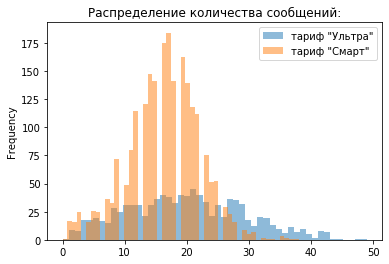

In [72]:
ultra_gb.plot(kind='hist', bins=50, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение количества сообщений:')
smart_gb.plot(kind='hist', bins=50, label='тариф "Смарт"', legend=True, alpha=0.5)
plt.show()

Пользователи тарифа "Смарт" используют незначительно меньше трафика, чем пользователи тарифа "Ультра"

### Гистограммы и распределения

Посчитаем среднюю длительность звонков в месяц по 2-м тарифам по всем пользователям,  
а также среднее количество отпраленных смс и среднее число использованных Гб по каждому пользователю:

In [73]:
grouped = df_joined.groupby('user_id')

df_countings = pd.DataFrame()
df_countings['mean_minutes'] = grouped.min_per_month.mean()
df_countings['std_minutes'] = grouped.min_per_month.std()
df_countings['var_minutes'] = grouped.min_per_month.var()

df_countings['mean_msg'] = grouped.messages_per_month.mean()
df_countings['std_msg'] = grouped.messages_per_month.std()
df_countings['var_msg'] = grouped.messages_per_month.var()

df_countings['mean_gb'] = grouped.gb_per_month.mean()
df_countings['std_gb'] = grouped.gb_per_month.std()
df_countings['var_gb'] = grouped.gb_per_month.var()

df_countings['income'] = grouped.monthly_income.mean()
df_countings['tariff'] = grouped.tariff.first()

df_countings.head()

,mean_minutes,std_minutes,var_minutes,mean_msg,std_msg,var_msg,mean_gb,std_gb,var_gb,income,tariff
user_id,,,,,,,,,,,
1000,320.750000,106.014487,11239.071429,62.0,18.361450,337.142857,13.625000,5.604526,31.410714,1950.00000,ultra
1001,422.000000,11.313708,128.000000,NaN,NaN,NaN,16.500000,3.535534,12.500000,985.15625,smart
1002,216.714286,52.242110,2729.238095,10.0,4.509250,20.333333,16.714286,3.147183,9.904762,1085.93750,smart
1003,764.400000,223.377036,49897.300000,76.0,23.021729,530.000000,11.800000,2.387467,5.700000,1950.00000,ultra
1004,123.375000,39.626605,1570.267857,149.0,25.867796,669.142857,18.750000,4.496030,20.214286,1950.00000,ultra


In [74]:
df_countings.isna().sum()

mean_minutes      6
std_minutes      40
var_minutes      40
mean_msg         72
std_msg         103
var_msg         103
mean_gb           1
std_gb           35
var_gb           35
income            0
tariff            0
dtype: int64

Т.к. в выборку попали клиенты, которые платили за тариф, но одновременно с этим не отправляли сообщения или не пользовались интернет-трафиком, у таких клиентов сформировались пропущенные значения вместо среднего в соответствующих столбцах. Таких пользователей нужно взять в учет, т.к. они совершали оплату услуг, поэтому все пропущенные значения заменим на ноль.

In [75]:
df_countings = df_countings.fillna(0)
df_countings.isna().sum()

mean_minutes    0
std_minutes     0
var_minutes     0
mean_msg        0
std_msg         0
var_msg         0
mean_gb         0
std_gb          0
var_gb          0
income          0
tariff          0
dtype: int64

Построим по полученным столбцам гистограммы распределения:  
отметим, мы будем рассматривать потраченные минуты и Гб как дискретные величины, т.к. мы округляли их до целых и строго определенных конкретных значений и область их значений не бесконечна.


#### **Гистограмма распределения средней длительности звонков в месяц по 2-м тарифам**  

In [76]:
df_countings.head()

,mean_minutes,std_minutes,var_minutes,mean_msg,std_msg,var_msg,mean_gb,std_gb,var_gb,income,tariff
user_id,,,,,,,,,,,
1000,320.750000,106.014487,11239.071429,62.0,18.361450,337.142857,13.625000,5.604526,31.410714,1950.00000,ultra
1001,422.000000,11.313708,128.000000,0.0,0.000000,0.000000,16.500000,3.535534,12.500000,985.15625,smart
1002,216.714286,52.242110,2729.238095,10.0,4.509250,20.333333,16.714286,3.147183,9.904762,1085.93750,smart
1003,764.400000,223.377036,49897.300000,76.0,23.021729,530.000000,11.800000,2.387467,5.700000,1950.00000,ultra
1004,123.375000,39.626605,1570.267857,149.0,25.867796,669.142857,18.750000,4.496030,20.214286,1950.00000,ultra


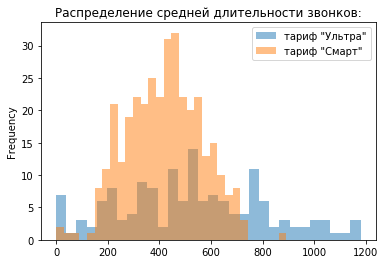

In [77]:
df_countings.query('tariff=="ultra"').mean_minutes.plot(kind='hist', bins=30, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение средней длительности звонков:')
df_countings.query('tariff=="smart"').mean_minutes.plot(kind='hist', bins=30, label='тариф "Смарт"', legend=True, alpha=0.5)
plt.show()

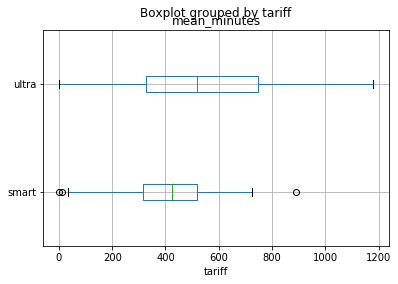

In [78]:
df_countings.boxplot(by="tariff", column='mean_minutes', vert=False)
plt.show()

Количество использованных минут среди пользователей тарифа "Ультра" распределены равномерно без выбросов по интервалу от 0 до примерно 1200 мин, в то время как пользователи тарифа "Смарт" тратят в основном от 200 до 600 мин в месяц.

**Гистограмма распределения стандартного отклонения длительности звонков в месяц по 2-м тарифам**

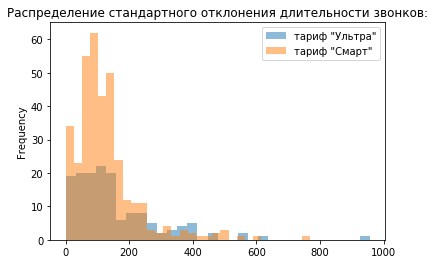

In [79]:
df_countings.query('tariff=="ultra"').std_minutes.plot(kind='hist', bins=30, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение стандартного отклонения длительности звонков:')
df_countings.query('tariff=="smart"').std_minutes.plot(kind='hist', bins=30, label='тариф "Смарт"', legend=True, alpha=0.5)
plt.show()

Распределение похоже на Пуассоновское. Стандартное отклонение по среднему использованию минут у тарифа смарт выше чем у пользователей тарифа ультра.

#### **Гистограмма распределения среднего количества сообщений в месяц по 2-м тарифам**

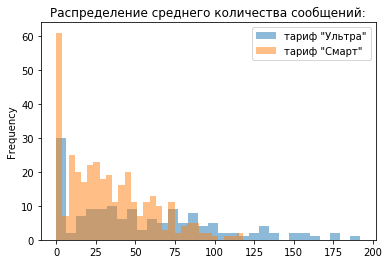

In [80]:
df_countings.query('tariff=="ultra"').mean_msg.plot(kind='hist', bins=30, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение среднего количества сообщений:')
df_countings.query('tariff=="smart"').mean_msg.plot(kind='hist', bins=30, label='тариф "Смарт"', legend=True, alpha=0.5)
plt.show()

Гистограмма напоминает Пуассоновское распределение. Построим диаграммы размаха, чтобы посмотреть на выбросы в данных

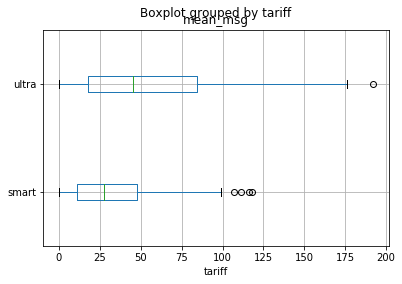

In [81]:
df_countings.boxplot(by="tariff", column='mean_msg', vert=False)
plt.show()

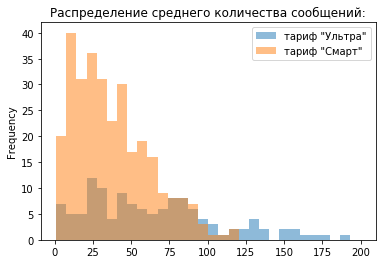

In [82]:
df_countings.query('tariff=="ultra"').mean_msg.plot(kind='hist', bins=30, label='тариф "Ультра"', legend=True, alpha=0.5, range=(1, 200), title='Распределение среднего количества сообщений:')
df_countings.query('tariff=="smart"').mean_msg.plot(kind='hist', bins=30, label='тариф "Смарт"', legend=True, alpha=0.5, range=(1, 200))
plt.show()

Если исключить нулевые значения, то можно увидеть, что в среднем равномерное количество пользователей тарифа ультра отправляют сообщения в промежутках от 1 до 175 в месяц, в то время как пользователи тарифа Смарт отправляют сообщения в среднем от 10 до 50 шт в месяц 

**Гистограмма распределения стандартного отклонения количества сообщений в месяц по 2-м тарифам**

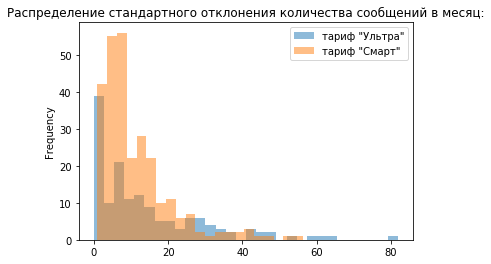

In [83]:
df_countings.query('tariff=="ultra"').std_msg.plot(kind='hist', bins=30, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение стандартного отклонения количества сообщений в месяц:')
df_countings.query('tariff=="smart"').std_msg.plot(kind='hist', bins=30, label='тариф "Смарт"', legend=True, alpha=0.5, range=(1, 80))
plt.show()

Стандартное отклонение по среднему количеству отправленных сообщений в месяц логично выше у пользователей тарифа Смарт чем у пользователей тарифа Ультра

#### **Гистограмма распределения среднего объема интернет-трафика в месяц по 2-м тарифам**

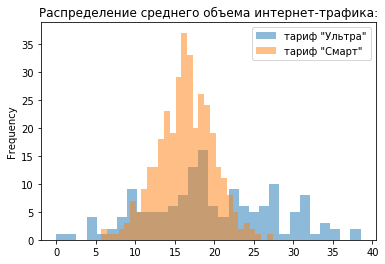

In [84]:
df_countings.query('tariff=="ultra"').mean_gb.plot(kind='hist', bins=30, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение среднего объема интернет-трафика:')
df_countings.query('tariff=="smart"').mean_gb.plot(kind='hist', bins=30, label='тариф "Смарт"', legend=True, alpha=0.5)
plt.show()

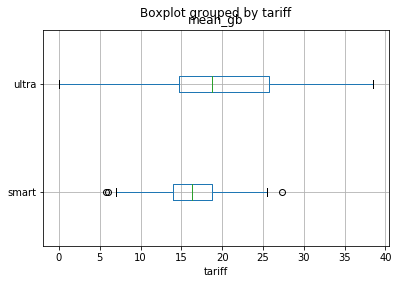

In [85]:
df_countings.boxplot(by="tariff", column='mean_gb', vert=False)
plt.show()

Распределение по гистограмме тарифа Смарт - нормальное, его клиенты в основном используют от 15 до 25 Гб в месяц, в то же время клиенты с тарифом Ультра используют свои Гб от 0 до 40 в равномерном количестве человек, но все же основной пик использования  у них приходится на 15-20Гб в месяц, почти как и у пользователей тарифа Ультра.

**Гистограмма распределения стандартного отклонения объема интернет-трафика в месяц по 2-м тарифам**

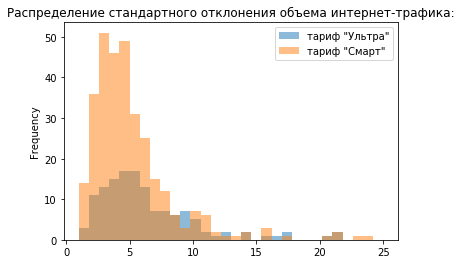

In [86]:
df_countings.query('tariff=="ultra"').std_gb.plot(kind='hist', bins=30, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение стандартного отклонения объема интернет-трафика:', range=(1, 25))
df_countings.query('tariff=="smart"').std_gb.plot(kind='hist', bins=30, label='тариф "Смарт"', legend=True, alpha=0.5, range=(1, 25))
plt.show()

Гистограмма напоминает скошенное вправо нормальное распределение
Стандартное отклонение по среднему количеству использованных Гб в месяц логично выше у пользователей тарифа Смарт чем у пользователей тарифа Ультра

#### **Гистограмма распределения выручки по 2-м тарифам**

In [87]:
df_countings.income.describe()

count     498.000000
mean     1591.546401
std       641.555250
min       550.000000
25%      1047.288542
50%      1676.696615
75%      1950.000000
max      4380.208333
Name: income, dtype: float64

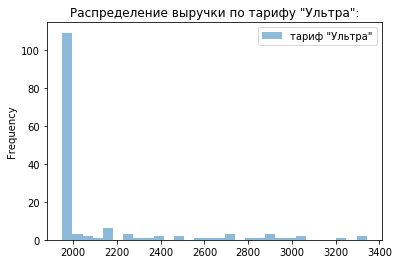

In [88]:
df_countings.query('tariff=="ultra"').income.plot(kind='hist', bins=30, label='тариф "Ультра"', legend=True, alpha=0.5, title='Распределение выручки по тарифу "Ультра":')
plt.show()

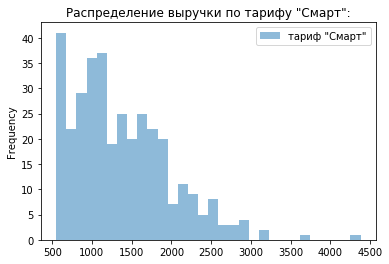

In [89]:
df_countings.query('tariff=="smart"').income.plot(kind='hist', bins=30, label='тариф "Смарт"', legend=True, alpha=0.5,  title='Распределение выручки по тарифу "Смарт":')
plt.show()

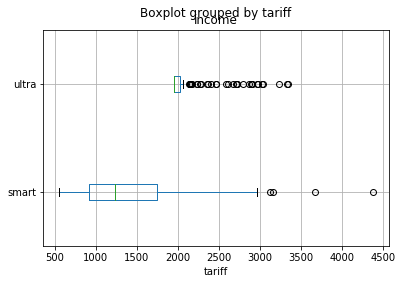

In [90]:
df_countings.boxplot(by="tariff", column='income', vert=False)
plt.show()

Средняя выручка по тарифу Ультра сконцентрирована на очень малом промежутке: примерно от 1800р до 2000р, все остальные редкие выбивающиеся значения от 2 до 3,5тыс - являются выбросами. Можно сделать вывод о том, что клиентам этого тарифа вполне хватает включенных в стоимость тарифа (=1950р) услуг и они редко тратят что-то вне оплаченного пакета, чего не скажешь о клиентах тарифа Смарт:  

средняя выручка по тарифу Смарт колеблется в более широком диапазоне - примерно от 900 до 1700р, при стоимости тарифа в 550р. Таким образом, можно сделать вывод о том, что клиентам данного тарифа систематически не хвататет услуг, входящих в него, из-за чего они вынуждены переплачивать за услуги, оказанные "сверх" пакета, входящего в тариф.  

При всем том, что клиенты тарифа Смарт вынуждены переплачивать, в сравнении с тарифом Ультра по графику рассеяния, они приносят оператору связи Мегалайн меньше выручки. Но это уравновешивается тем, что клиентов данного тарифа сравнительно больше чем клиентов тарифа Смарт, что вероятно, в итоге уравновешивает прибыль от обоих тарифов.

In [91]:
clients_ultra = df_countings.query('tariff=="ultra"').tariff.count()
clients_smart = df_countings.query('tariff=="smart"').tariff.count()

ultra_income = df_joined.query('tariff=="ultra"').monthly_income.sum()
smart_income = df_joined.query('tariff=="smart"').monthly_income.sum()
total_income = df_joined.monthly_income.sum()

print('Количество клиентов тарифов (из общего колчества, равного 500 чел):')
print('"Ультра":\t', clients_ultra, 'чел =', clients_ultra/5, '% из 100 %')
print('"Смарт":\t', clients_smart, 'чел =', clients_smart/5, '% из 100 %')
print()
print('Общая прибыль от клиентов за весь период выборки (2018 год):')
print('по тарифу "Ультра":\t', ultra_income, 'руб = {:.1%}'.format(ultra_income/total_income))
print('по тарифу "Смарт":\t', smart_income, 'руб = {:.1%}'.format(smart_income/total_income))
print('из общей выручки, равной', total_income, 'руб = 100 %')

Количество клиентов тарифов (из общего колчества, равного 500 чел):
"Ультра":	 148 чел = 29.6 % из 100 %
"Смарт":	 350 чел = 70.0 % из 100 %

Общая прибыль от клиентов за весь период выборки (2018 год):
по тарифу "Ультра":	 2056031.25 руб = 40.8%
по тарифу "Смарт":	 2987704.125 руб = 59.2%
из общей выручки, равной 5043735.375 руб = 100 %


По итогу, как мы и предполагали, хоть пользователи тарифа Смарт и тратят в среднем меньше денег, чем пользователи тарифа Ультра, они берут своим количеством, в результате давая бОльшую выручку, чем вторые за счет превосходящего количества. 

## Шаг. Проверим гипотезы

### средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Сформулируем гипотезы о равенстве средних для двух выборок:  

**H0 (нулевая гипотеза):** средняя выручка от пользователей тарифа «Ультра» **РАВНА** средней выручке от пользователей тарифа «Смарт»  
**H1 (альтернативная гипотеза):** средняя выручка от пользователей тарифа «Ультра» **НЕ РАВНА** средней выручке от пользователей тарифа «Смарт»  

Для проверки гипотезы используем метод ttest_ind из пакета scipy.stats, который мы экспортировали в самом начале проекта.  
Данный метод используется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам и поэтому нам подходит.

Методу передадим 2 массива данных:   
* прибыль от клиентов, пользующихся тарифом "Ультра"  
* и прибыль от клиентов, пользующихся тарифом "Смарт", 
* а также уровень значимости alpha.

Критический уровень статистической значимости зададим стандартным значением 0.05.

In [92]:
income_ultra = df_countings.query('tariff=="ultra"').income.values
income_smart = df_countings.query('tariff=="smart"').income.values

alpha = 0.05

results = st.ttest_ind(income_ultra, income_smart, equal_var = False) 

print('p-значение:', results.pvalue)

p-значение: 1.4189473894504586e-51


сравним получившееся p-значение с заданным уровнем статистической значимости:

In [93]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Отвергаем нулевую гипотезу.


In [94]:
print('Средняя выручка по тарифу Ультра:\t{:.2f} руб / мес'.format(df_countings.query('tariff=="ultra"').income.mean()))
print('Средняя выручка по тарифу Смарт:\t{:.2f} руб / мес'.format(df_countings.query('tariff=="smart"').income.mean()))

Средняя выручка по тарифу Ультра:	2104.20 руб / мес
Средняя выручка по тарифу Смарт:	1374.77 руб / мес


Полученное значение p-value говорит о том, что существует очень маленькая близкая к нулю вероятность того, что средняя выручка по двум рассматриваемым тарифам может оказаться равной. Поэтому на основе полученных результатов можно сделать смелое предположение о том, что доходы с двух тарифов с очень большой вероятностью будут различаться.

### средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов

Сформулируем гипотезы о равенстве средних для двух выборок:  

**H0 (нулевая гипотеза):** средняя выручка от пользователей из Москвы **РАВНА** средней выручке от пользователей из других регионов  
**H1 (альтернативная гипотеза):** средняя выручка от пользователей из Москвы **НЕ РАВНА** средней выручке от пользователей из других регионов   


Для начала нам необходимо вытащить из таблицы с пользователями (df_u) данные о городе проживания (city) и сделать сводную таблицу, включающую столбцы: id пользователя, город проживания, тариф и среднюю месячную выручку.

In [95]:
df_clients = df_countings[['tariff','income']]
df_clients = df_clients.join(df_u[['user_id', 'city']].set_index('user_id'))
df_clients.head()

,tariff,income,city
user_id,,,
1000,ultra,1950.00000,Краснодар
1001,smart,985.15625,Москва
1002,smart,1085.93750,Стерлитамак
1003,ultra,1950.00000,Москва
1004,ultra,1950.00000,Новокузнецк


Для проверки гипотезы используем метод ttest_ind из пакета scipy.stats.  
Данный метод используется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам и поэтому нам подходит.

Методу передадим 2 массива данных:   
* прибыль от клиентов, проживающих в Москве  
* и прибыль от клиентов из других регионов, 
* а также уровень значимости alpha.

Критический уровень статистической значимости зададим стандартным значением 0.05. 

По таблице df_clients сформируем 2 массива данных, содержащих прибыль от клиентов Москвы и прибыль от клиентов других городов, которые необходимо будет передать методу ttest_ind и найдем P-value:

In [96]:
msk_clients = df_clients.query('city=="Москва"').income.values
other_clients = df_clients.query('city!="Москва"').income.values

alpha = 0.05

results = st.ttest_ind(msk_clients, other_clients, equal_var = False) 

print('p-значение:', results.pvalue)

p-значение: 0.34451042695087875


равним получившееся p-значение с заданным уровнем статистической значимости:

In [97]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

Не получилось отвергнуть нулевую гипотезу.


In [98]:
print('Средняя выручка по Москве:\t{:.2f} руб / мес'.format(df_clients.query('city=="Москва"').income.mean()))
print('Средняя выручка по др городам:\t{:.2f} руб / мес'.format(df_clients.query('city!="Москва"').income.mean()))


Средняя выручка по Москве:	1538.96 руб / мес
Средняя выручка по др городам:	1604.59 руб / мес


Полученное значение p-value говорит о том, что хотя средний доход в месяц с клиентов Москвы и с клиентов других городов неодинаков, с вероятностью почти 37% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средним доходом с клиентов Москвы и клиентов, проживающих в других городах.

## Шаг. Общий вывод

В данном проекте мы проделали большую работу над данными пользователей, пользующихся двумя разными по условиям и стоимости тарифами компании «Мегалайн». Целью нашего исследования являлось выяснить какой тариф окажется лучше и выгоднее для оператора сотовой связи.

* В первой части мы провели первичную обработку данных: проанализировали данные на наличие ошибок и пропусков, объяснили ход своих действий. 
* Во второй части мы произвели необходимые рассчеты, сформировав новые столбцы и подготовили сводные таблицы для дальнейшей работы с данными. 
* В третьей части провели анализ по сформированной сводной таблице, которая включала все необходимые статистические метрики (среднее, стандартное отклонение, дисперсию), построили гистограммы и диаграммы рассеяния, проанализировав и описав по ним распределение величин.
* В заключительной части, мы проверили 2 гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам, применив метод scipy.stats.ttest_ind. Мы сформулировали выводы о том, что нельзя утверждать что доходы по тарифам одинаковы, также как нельзя отвергать гипотезу о равенстве выручки с клиентов в Москве и других регионах.  

Мы выдвинули и впоследствии приняли гипотезу о важном моменте: о том, что прибыли от тарифов с большой долей вероятности всегда будут различаться, что подтверждает факт того, что один тариф всегда будет выгоднее оператору с точки зрения дохода от него. Так же надо учесть, то что на основе произведенного до выдвижения гипотез анализа и сравнения среднего дохода с двух тарифов, мы выяснили, что тариф "Смарт" приносит больше прибыли за счет большего количества клиентов, выбирающих его благодаря дешевизне. А значит, он имеет и большую популярность чем более дорогой, но все же менее восстребованный тариф "Ультра". Также мы уже отмечали, что выбирая тариф "Смарт" люди очень часто вынуждены переплачивать, т.к. им не хватает услуг входящих в пакет, что также приносит дополнительный доход оператору связи.  

Таким образом, на основе анализа предоставленной нам выборки, можно сформулировать вывод о том, что тариф "Смарт" выгоднее, чем тариф "Ультра", т.к. приносит компании "Мегалайн" больше дохода.